### 🔹Importing Libraries.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objs as go
import plotly.io as pio

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.utils import resample, shuffle
from sklearn.metrics import silhouette_score, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier


import joblib
import pickle
import warnings
warnings.filterwarnings('ignore')

### 🔹Discovering data.

In [2]:
water = pd.read_csv("D:\Water Potability System (AI)'24\water-potability-prediction-system\water_potability.csv")

In [3]:
water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
water.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.80216,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.57822,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.86938,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.17706,7.509306,NaN,327.459761,16.140368,78.698446,2.309149,1


In [5]:
water.shape

(3276, 10)

In [6]:
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [7]:
water.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [8]:
water.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,481.792305,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


<Axes: >

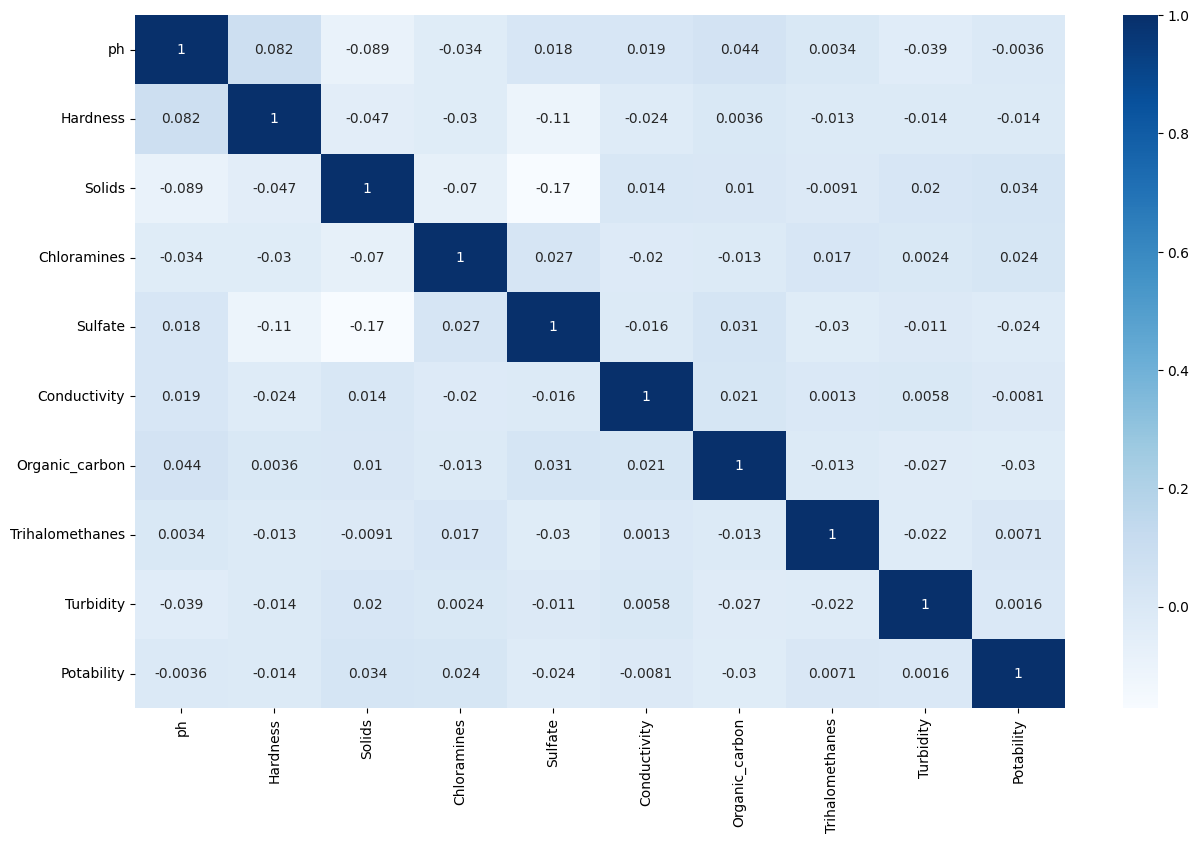

In [9]:
correlation = water.corr()
plt.figure(figsize=(15, 9))
sns.heatmap(correlation, annot=True, cmap='Blues')

### 🔹Cleaning data.

> * Checking for duplicates in data.

In [10]:
# Gets the count of duplicated rows.
water.duplicated().sum()

0

In [11]:
# Gets the percentage of duplicated rows.
(water.duplicated().sum()/len(water))*100

0.0

> * Checking for nulls in data.

In [12]:
# Gets null count for each column.
water.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [13]:
# Gets null percentage for each column. 
(water.isnull().sum()/len(water))*100

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

> * Visualizing columns with NULL values.

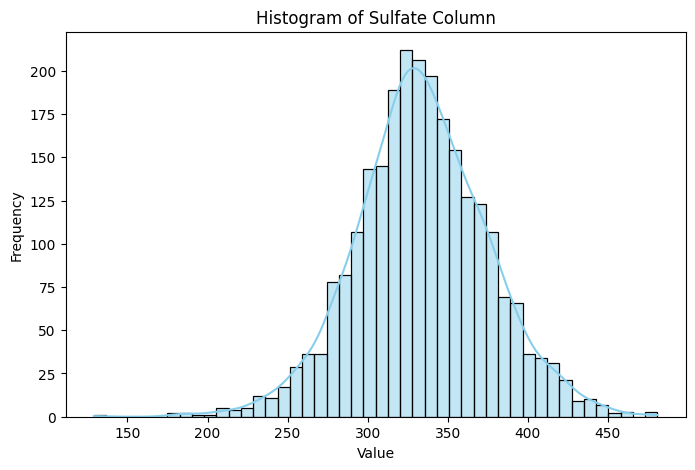

In [14]:
data_sulfate = water['Sulfate']

#histogram
plt.figure(figsize=(8, 5))
sns.histplot(data_sulfate, kde=True, color='skyblue')
plt.title('Histogram of Sulfate Column')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

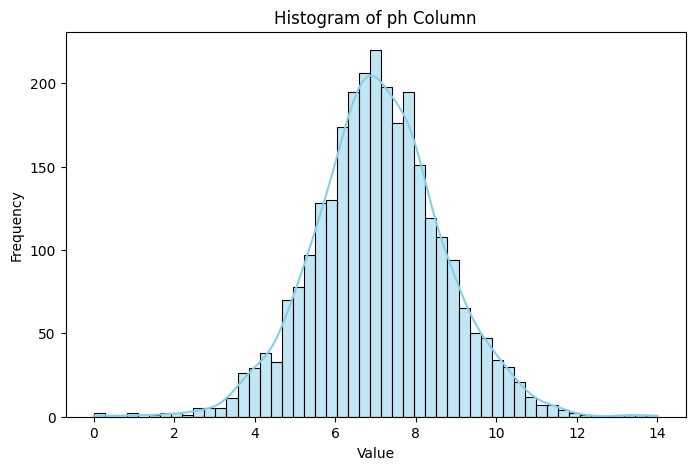

In [15]:
data_ph = water['ph']

#histogram
plt.figure(figsize=(8, 5))
sns.histplot(data_ph, kde=True, color='skyblue')
plt.title('Histogram of ph Column')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

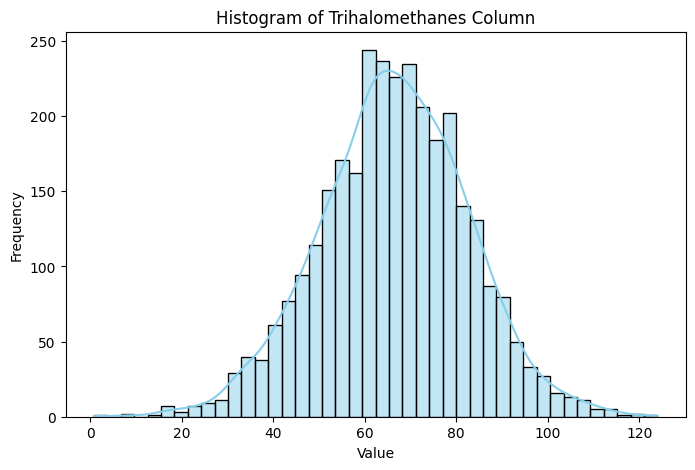

In [16]:
data_Trihalomethanes = water['Trihalomethanes']

#histogram
plt.figure(figsize=(8, 5))
sns.histplot(data_Trihalomethanes, kde=True, color='skyblue')
plt.title('Histogram of Trihalomethanes Column')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

> * Conclusion: data for 3 columns having NULLS (ph, sulfate, trihalomethanes) is normally distributed.

> * Replacing nulls with median is the best option "as it is less sensitive to outliers than the mean" rather than deleting their whole rows.

> * Replacing NULLS with median of each category of its column (0,1).

In [17]:
# Calculating median only for the rows which have potability = 0.
false_median_ph = water.loc[water['Potability'] == 0, 'ph'].median()
false_median_sulfate = water.loc[water['Potability'] == 0, 'Sulfate'].median()
false_median_trihalomethanes = water.loc[water['Potability'] == 0, 'Trihalomethanes'].median()

# Calculating median only for the rows which have potability = 1.
true_median_ph = water.loc[water['Potability'] == 1, 'ph'].median()
true_median_sulfate = water.loc[water['Potability'] == 1, 'Sulfate'].median()
true_median_trihalomethanes = water.loc[water['Potability'] == 1, 'Trihalomethanes'].median()

# Fill missing values with the medians we calculated above.
water['ph'] = np.where((water['Potability'] == 0) & (water['ph'].isnull()), false_median_ph, water['ph'])
water['Sulfate'] = np.where((water['Potability'] == 0) & (water['Sulfate'].isnull()), false_median_sulfate, water['Sulfate'])
water['Trihalomethanes'] = np.where((water['Potability'] == 0) & (water['Trihalomethanes'].isnull()), false_median_trihalomethanes, water['Trihalomethanes'])

water['ph'] = np.where((water['Potability'] == 1) & (water['ph'].isnull()), true_median_ph, water['ph'])
water['Sulfate'] = np.where((water['Potability'] == 1) & (water['Sulfate'].isnull()), true_median_sulfate, water['Sulfate'])
water['Trihalomethanes'] = np.where((water['Potability'] == 1) & (water['Trihalomethanes'].isnull()), true_median_trihalomethanes, water['Trihalomethanes'])

# Cheking they got replaced.
water.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

### 🔹Oversampling

> * Visualizing the number of unique values for Potability column before oversampling.

In [18]:
# Counts the number of unique values for Potability column (0,1).
potability_counts = water['Potability'].value_counts()

In [19]:
fig_before = px.pie(names=potability_counts.index,
values=potability_counts.values,
title='Distribution of Potability Classes before oversampling.',
labels={'names': 'Potability'})
# Update pie chart colors to blue.
fig_before.update_traces(marker=dict(colors=['#1f77b4', '#aec7e8']))
fig_before.show()

> * This is an issue, due to the biased data points toward the zeroes counts in the target feature "Potability", this will result in a biased training dataset handed to models leading to poor model accuracy.

### 🔹Proof of the poor accuracy and the need of upscaling

In [20]:
# X-> features, Y -> target
X = water.drop(columns=['Potability'], axis=1)
y = water['Potability']

# Scaling data to avoid dominance of highly scaled features.
sc=StandardScaler()
features=X.columns
X_scaled=sc.fit_transform(X)
upsampled_scaled=pd.DataFrame(X_scaled, columns=features)

# Splitting features into test and traib of 20% to 80%.
X_train, X_test, y_train,y_test= train_test_split(upsampled_scaled, y, test_size=0.2, random_state=42)

> * n_jobs = -1 use all available CPU cores for parallel processing with hyperparameter tuning.

In [21]:
# Logistic Regression.
log_reg_params = {
    'C': [0.1, 1, 10],  # Regularization.
    'penalty': ['l1', 'l2'], # Cost function coefficients.
    'solver': ['liblinear'], # Optimization.
    'random_state': [0]  # Ensure same output with each run. 
}
Log_reg = GridSearchCV(LogisticRegression(), log_reg_params, cv=5, n_jobs=-1)

# Support Vector Machine.
svm_params = {
    'C': [0.1, 1, 10],  # Regularization.
    'gamma': [0.1, 1, 10],  # To control the similarity radius when training data.
    'random_state': [0]  # Ensure same output with each run.
}
Svm = GridSearchCV(SVC(), svm_params, cv=5, n_jobs=-1)

# Decision Tree.
dt_params = {
    'max_depth': [None, 10, 20],  # Control no. of tree levels. (when to stop splitting).
    'min_samples_split': [2, 5, 10], # Controls splitting of nodes.
    'random_state': [0] # Ensure same output with each run.
}
decision_tree = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5, n_jobs=-1)

# printing accuracies
classifiers=[('Logistic Regression', Log_reg),('Support Vector Machine', Svm),('Decision Tree', decision_tree)]
for classifier_name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred= classifier.predict(X_test)
    accuracy= accuracy_score(y_test, y_pred)
    print('{:s} : {:.2f}'.format(classifier_name, accuracy*100))

Logistic Regression : 62.80
Support Vector Machine : 69.82
Decision Tree : 74.24


### 🔹Shuffling and Simple Oversampling.

> * Random oversampling.

In [22]:
print("Before Shuffling and Oversampling:")
print(water['Potability'].value_counts())

minority_class = water[water['Potability'] == 1]
majority_class = water[water['Potability'] == 0]
shuffled_minority = shuffle(minority_class) # Shuffled to enuse oversampling proccess doesn't get biased.

# Oversampling the minority class by repeating samples.
oversampled_minority = shuffled_minority.sample(n=len(majority_class), replace=True, random_state=42)

# Combining the oversampled minority class with the original majority class.
upsampled_data = pd.concat([majority_class, oversampled_minority])

# Shuffling the combined dataset.
upsampled_data = shuffle(upsampled_data, random_state=42)

print("\nAfter Shuffling and Oversampling:")
print(upsampled_data['Potability'].value_counts())

Before Shuffling and Oversampling:
Potability
0    1998
1    1278
Name: count, dtype: int64

After Shuffling and Oversampling:
Potability
0    1998
1    1998
Name: count, dtype: int64


> * Visualizing the number of unique values for Potability column after oversampling.

In [23]:
# Counts the number of unique values for Potability column (0,1).
potability_counts = upsampled_data['Potability'].value_counts()

In [24]:
fig_after = px.pie(names=potability_counts.index,
values=potability_counts.values,
title='Distribution of Potability Classes after oversampling.',
labels={'names': 'Potability'})

# Update pie chart colors to blue.
fig_after.update_traces(marker=dict(colors=['#1f77b4', '#aec7e8']))  # Blue colors
fig_after.show()

### 🔹Outliers.

> * Box plot visualization of how data would look normaly.

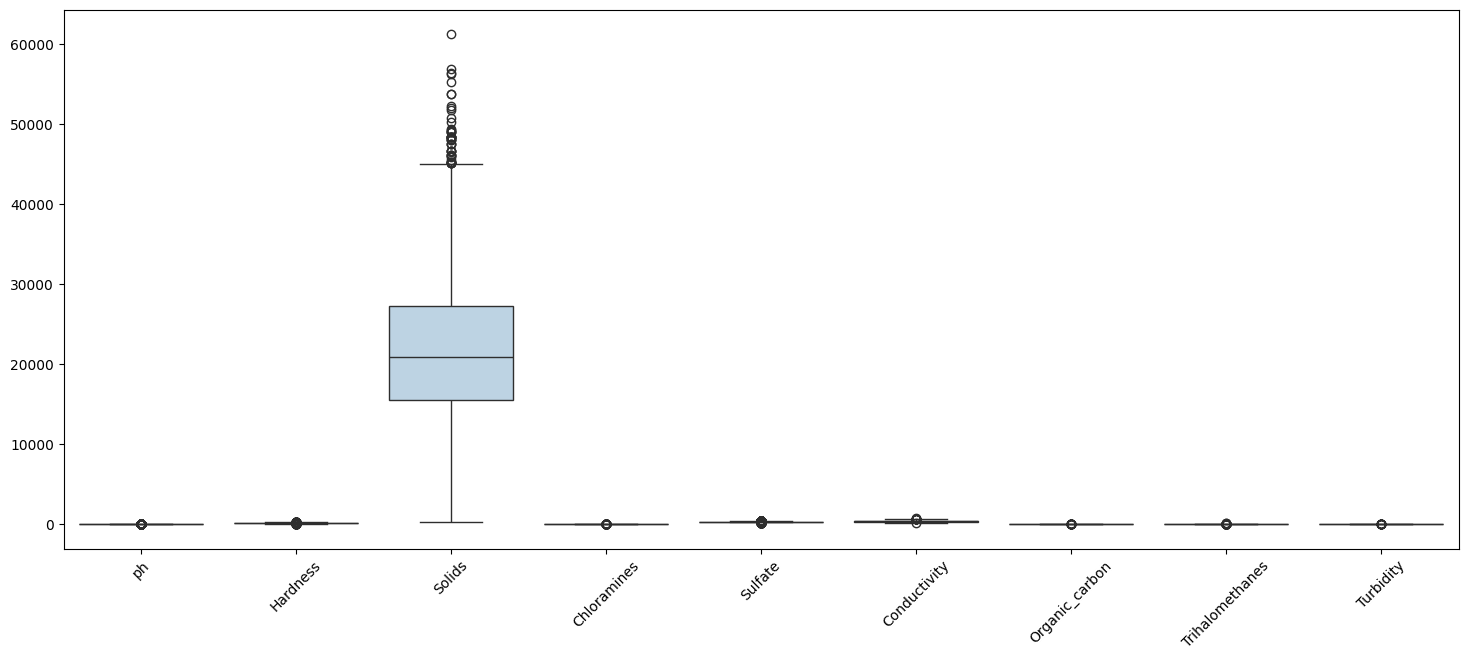

In [25]:
columns_to_scale = ['ph', 'Hardness', 'Solids',  'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']
scaled_water_df = pd.DataFrame(upsampled_data[columns_to_scale], columns=columns_to_scale)
plt.figure(figsize=(18,7))
sns.boxplot(data=scaled_water_df, palette='Blues')
plt.xticks(rotation=45)  #rotating x-axis labels for better readability
plt.show()

> * Box plot visualization of how data would look after using min-max scaling to visualize it better.

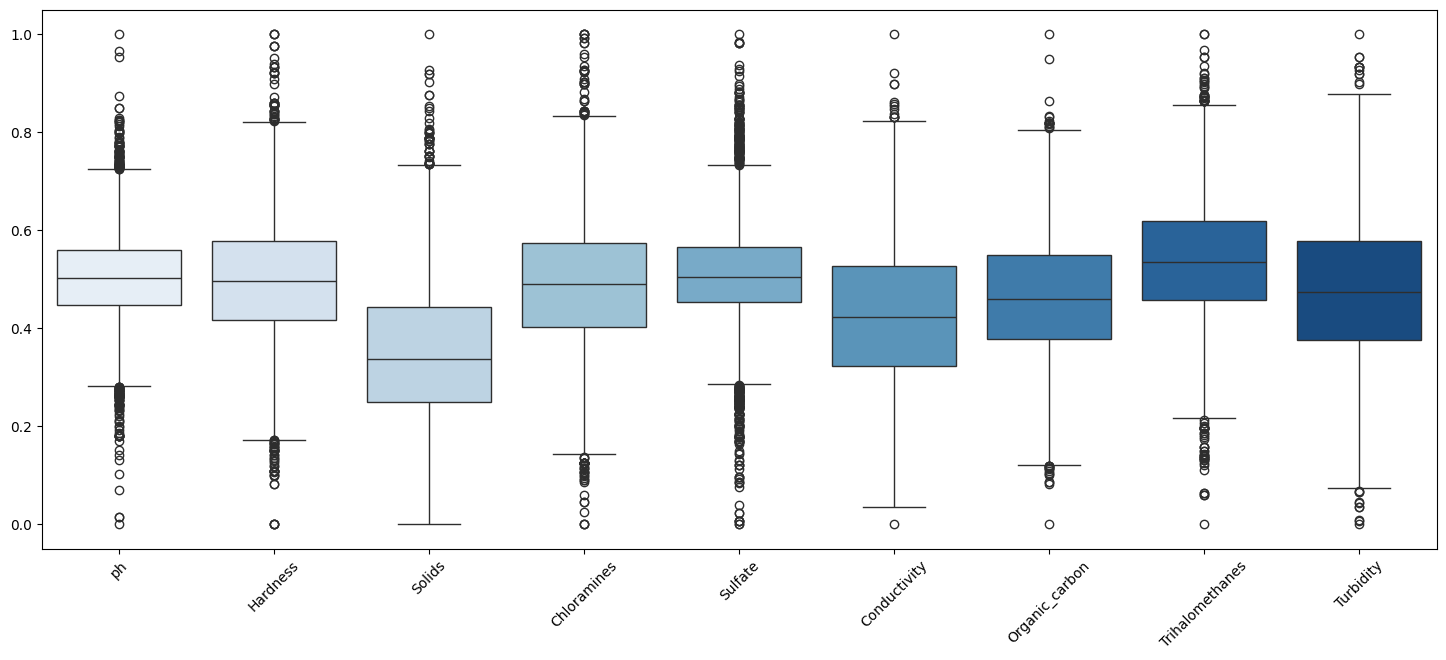

In [26]:
columns_to_scale = ['ph', 'Hardness', 'Solids',  'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']
scaler = MinMaxScaler()
scaled_water = scaler.fit_transform(upsampled_data[columns_to_scale])

#creating a DataFrame with scaled data
scaled_water_df = pd.DataFrame(scaled_water, columns=columns_to_scale)
plt.figure(figsize=(18,7))
sns.boxplot(data=scaled_water_df, palette='Blues')
plt.xticks(rotation=45)  #rotating x-axis labels for better readability
plt.show()

### 🔹Calculating number of outliers for each column.

In [27]:
columns_replace =upsampled_data.columns
for col in columns_replace:
    #calculating interquartile ranges: Q1,Q3
    q25, q75 = np.percentile(upsampled_data[col], 25), np.percentile(upsampled_data[col], 75)
    iqr = q75 - q25
    #calculating the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off

    outliers = ( ( upsampled_data[col] < lower) | (upsampled_data[col] > upper) )
    index_label = upsampled_data[outliers].index
    print(f'Number of outliers in {col}: {len(index_label)}')

Number of outliers in ph: 175
Number of outliers in Hardness: 87
Number of outliers in Solids: 49
Number of outliers in Chloramines: 73
Number of outliers in Sulfate: 332
Number of outliers in Conductivity: 14
Number of outliers in Organic_carbon: 32
Number of outliers in Trihalomethanes: 74
Number of outliers in Turbidity: 22
Number of outliers in Potability: 0


In [28]:
upsampled_data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3996.000000,3996.000000,3996.000000,3996.000000,3996.000000,3996.000000,3996.000000,3996.000000,3996.000000,3996.000000
mean,7.068724,197.391885,21967.455819,7.137920,333.199897,426.610340,14.270368,66.700785,3.970447,0.500000
std,1.432086,33.201706,8743.527589,1.616861,36.806795,80.368101,3.302990,15.838560,0.786501,0.500063
min,0.000000,73.492234,320.942611,1.390871,180.206746,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.280639,177.574038,15517.391120,6.110226,316.775351,366.781539,12.069535,57.229928,3.436425,0.000000
50%,7.036752,197.647740,20868.479600,7.154347,332.285672,423.850390,14.196551,66.678214,3.957012,0.500000
75%,7.833971,218.153199,27332.762125,8.141604,350.398274,482.596350,16.548438,77.101540,4.515024,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


> * Calculating minimum and maximum values for each column.

In [29]:
min_value = upsampled_data['ph'].min()
max_value = upsampled_data['ph'].max()

print("Minimum value of ph:", min_value)
print("Maximum value of ph:", max_value)

Minimum value of ph: 0.0
Maximum value of ph: 14.0


> * Normal and true values for pH [0-14], so nothing is considered as an outlier

In [30]:
print("Minimum value of hardness:", upsampled_data['Hardness'].min())
print("Maximum value of hardness:", upsampled_data['Hardness'].max())

Minimum value of hardness: 73.49223369
Maximum value of hardness: 323.124


> * For water hardness, it is often in the range of 50-500 mg/L

In [31]:
print("Minimum value of solids:", upsampled_data['Solids'].min())
print("Maximum value of solids:", upsampled_data['Solids'].max())

Minimum value of solids: 320.9426113
Maximum value of solids: 61227.19601


> * For solids, total dissolved solids (TDS) represent the amount of inorganic and organic substances dissolved in water. TDS values can range from a few tens of milligrams per liter (mg/L) to several thousand mg/L, depending on factors such as the mineral content and pollution levels.

In [32]:
print("Minimum value of chloramines:", upsampled_data['Chloramines'].min())
print("Maximum value of chloramines:", upsampled_data['Chloramines'].max())

Minimum value of chloramines: 1.390870905
Maximum value of chloramines: 13.127


> * Chloramines are disinfection byproducts formed when chlorine is used to disinfect water containing ammonia or organic nitrogen compounds.

> * The level of chloramines in water can vary depending on several factors, including water treatment processes, source water quality, and environmental conditions.

> * Concentrations of chloramines in drinking water are typically in the range of 1-5 mg/L

In [33]:
Q1_chloramines = upsampled_data['Chloramines'].quantile(0.25)
Q3_chloramines = upsampled_data['Chloramines'].quantile(0.75)
IQR_chloramines = Q3_chloramines - Q1_chloramines

#Define the IQR range
IQR_min_chloramines = Q1_chloramines - 1.5 * IQR_chloramines
IQR_max_chloramines = Q3_chloramines + 1.5 * IQR_chloramines
Chloramines_outliers = upsampled_data[(upsampled_data['Chloramines'] < IQR_min_chloramines) | (upsampled_data['Chloramines'] > IQR_max_chloramines)]

# Show the outliers of 'Chloramines' column and their corresponding 'Potability' values
print(Chloramines_outliers[['Chloramines', 'Potability']])

      Chloramines  Potability
2424    12.246394           1
2206     2.458609           0
2350     1.390871           1
757     12.279374           1
2370    11.994290           1
...           ...         ...
2350     1.390871           1
2796     3.016033           1
2346     2.855790           1
2424    12.246394           1
814     11.302831           1

[73 rows x 2 columns]


> * Extreme values of chloramines doesn't have a direct effect on potability: therefore, a correlation coeff. indicating a non-linear relationship.

In [34]:
print("Minimum value of sulfate:", upsampled_data['Sulfate'].min())
print("Maximum value of sulfate:", upsampled_data['Sulfate'].max())

Minimum value of sulfate: 180.2067464
Maximum value of sulfate: 481.0306423


> * Sulfate concentrations in water can vary depending on the geological characteristics of the area.

In [35]:
print("Minimum value of conductivity:", upsampled_data['Conductivity'].min())
print("Maximum value of conductivity:", upsampled_data['Conductivity'].max())

Minimum value of conductivity: 181.483754
Maximum value of conductivity: 753.3426196


> * Electrical conductivity is a measure of the ability of water to conduct an electrical current and is related to the concentration of dissolved ions.

> * Conductivity values in natural waters can range from less than 50 μS/cm (microsiemens per centimeter) in pure water to several thousand μS/cm in highly mineralized waters.

In [36]:
print("Minimum value of organic carbon:", upsampled_data['Organic_carbon'].min())
print("Maximum value of organic carbon:", upsampled_data['Organic_carbon'].max())

Minimum value of organic carbon: 2.2
Maximum value of organic carbon: 28.3


> * The concentration of organic carbon in water can vary widely depending on factors such as the presence of organic matter, pollution levels, and treatment processes.

> * Typical levels of organic carbon in natural waters are in the range of 1-10 mg/L

In [37]:
Q1_organic_carbon = upsampled_data['Organic_carbon'].quantile(0.25)
Q3_organic_carbon = upsampled_data['Organic_carbon'].quantile(0.75)
IQR_organic_carbon = Q3_organic_carbon - Q1_organic_carbon

#Define the IQR range
IQR_min_organic_carbon = Q1_organic_carbon - 1.5 * IQR_organic_carbon
IQR_max_organic_carbon = Q3_organic_carbon + 1.5 * IQR_organic_carbon
organic_carbon_outliers = upsampled_data[(upsampled_data['Organic_carbon'] < IQR_min_organic_carbon) | (upsampled_data['Organic_carbon'] > IQR_max_organic_carbon)]

# Show the outliers of 'organic_carbon' column and their corresponding 'Potability' values
print(organic_carbon_outliers[['Organic_carbon', 'Potability']])

      Organic_carbon  Potability
3169       23.604298           1
1663        4.473092           0
2236       27.006707           0
227        23.399516           0
785         2.200000           1
2680        5.159380           0
1536        5.218233           1
2224        4.466772           0
1827       23.317699           0
1390        4.371899           0
43         23.917601           0
2138        4.902888           0
698        23.569645           1
2601       23.667667           0
333         5.315287           1
333         5.315287           1
698        23.569645           1
3169       23.604298           1
876         4.966862           0
558        23.514774           0
1055       23.952450           0
2414        5.196717           1
333         5.315287           1
420        23.373265           0
1689        5.051695           0
1447        4.861631           0
3169       23.604298           1
3169       23.604298           1
333         5.315287           1
2057      

> * High organic carbon levels doesn't necessarily indicate 0 water potability nor 1

In [38]:
print("Minimum value of trihalomethanes:", upsampled_data['Trihalomethanes'].min())
print("Maximum value of trihalomethanes:", upsampled_data['Trihalomethanes'].max())

Minimum value of trihalomethanes: 0.738
Maximum value of trihalomethanes: 124.0


> * Trihalomethanes are disinfection byproducts formed when **chlorine** reacts with **organic matter** in water.

> * THM concentrations in drinking water are typically regulated and are often below 100 μg/L (micrograms per liter).

In [39]:
print("Minimum value of turbidity:", upsampled_data['Turbidity'].min())
print("Maximum value of turbidity:", upsampled_data['Turbidity'].max())

Minimum value of turbidity: 1.45
Maximum value of turbidity: 6.739


> * Turbidity values in natural waters can vary widely depending on factors such as sedimentation, erosion, and anthropogenic activities.

### 🔹Replacing outliers with upper and lower bounds.

In [40]:
specified_columns = ['Chloramines', 'Sulfate']
columns_replace = upsampled_data[specified_columns]

for col in columns_replace:
  #calculating interquartile ranges: Q1,Q3:
    q25, q75 = np.percentile(upsampled_data[col], 25), np.percentile(upsampled_data[col], 75)
    iqr = q75 - q25
    #calculate the outlier cutoff:
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off 
                                                    #condition               # True.          # False.  
    upsampled_data[col] = np.where(upsampled_data[col] < (q25 - cut_off), q25 - cut_off, upsampled_data[col])
    upsampled_data[col] = np.where(upsampled_data[col] > (q75 + cut_off), q75 + cut_off, upsampled_data[col])

### 🔹Feature Scaling

In [41]:
X = upsampled_data.drop(columns=['Potability'], axis=1)
y = upsampled_data['Potability']
sc=StandardScaler()
features=X.columns
X_scaled=sc.fit_transform(X)
upsampled_scaled=pd.DataFrame(X_scaled, columns=features)

In [42]:
upsampled_data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
2879,4.227537,201.447487,13122.32958,6.932558,374.843538,402.660774,22.823293,76.469426,4.479628,0
3227,7.679595,200.072928,32000.84391,7.633725,290.740337,583.608398,16.844509,39.367056,3.297525,1
2889,8.460964,236.831781,13158.84836,5.478276,333.389426,547.911680,16.741463,74.251544,4.728494,0
3245,7.036752,188.536608,24711.41493,7.129520,331.838167,555.548534,16.959269,56.038702,4.331691,1
1972,5.892413,139.362253,11006.04851,5.311990,339.327905,446.494394,10.567071,89.692883,3.311813,1


In [43]:
upsampled_scaled.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,-1.984199,0.122166,-1.011746,-0.127764,1.294150,-0.298036,2.589773,0.616840,0.647481
1,0.426614,0.080760,1.147665,0.316352,-1.317662,1.953732,0.779434,-1.725987,-0.855697
2,0.972298,1.188036,-1.007569,-1.048899,0.006799,1.509511,0.748232,0.476792,0.963942
3,-0.022328,-0.266745,0.313867,-0.003009,-0.041375,1.604546,0.814183,-0.673257,0.459362
4,-0.821500,-1.748009,-1.253816,-1.154224,0.191218,0.247443,-1.121336,1.451835,-0.837528


In [44]:
upsampled_scaled.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,3.996000e+03,3.996000e+03,3.996000e+03,3.996000e+03,3.996000e+03,3.996000e+03,3.996000e+03,3.996000e+03,3.996000e+03
mean,8.179421e-17,4.925434e-16,-2.444936e-17,4.827636e-16,3.165080e-16,8.001607e-16,3.911897e-17,4.552026e-16,-4.872090e-16
std,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00
min,-4.936582e+00,-3.732192e+00,-2.476028e+00,-2.578622e+00,-2.075380e+00,-3.050430e+00,-3.654834e+00,-4.165217e+00,-3.205035e+00
25%,-5.503744e-01,-5.969671e-01,-7.377882e-01,-6.486249e-01,-5.091484e-01,-7.445278e-01,-6.663987e-01,-5.980368e-01,-6.790702e-01
50%,-2.232819e-02,7.707061e-03,-1.257060e-01,1.271589e-02,-2.747779e-02,-3.434566e-02,-2.235137e-02,-1.425232e-03,-1.708490e-02
75%,5.344252e-01,6.253869e-01,6.137086e-01,6.380395e-01,5.350062e-01,6.967070e-01,6.897858e-01,6.567552e-01,6.924907e-01
max,4.840593e+00,3.787391e+00,4.490711e+00,2.568036e+00,2.101238e+00,4.065956e+00,4.248087e+00,3.618156e+00,3.520529e+00


<Axes: >

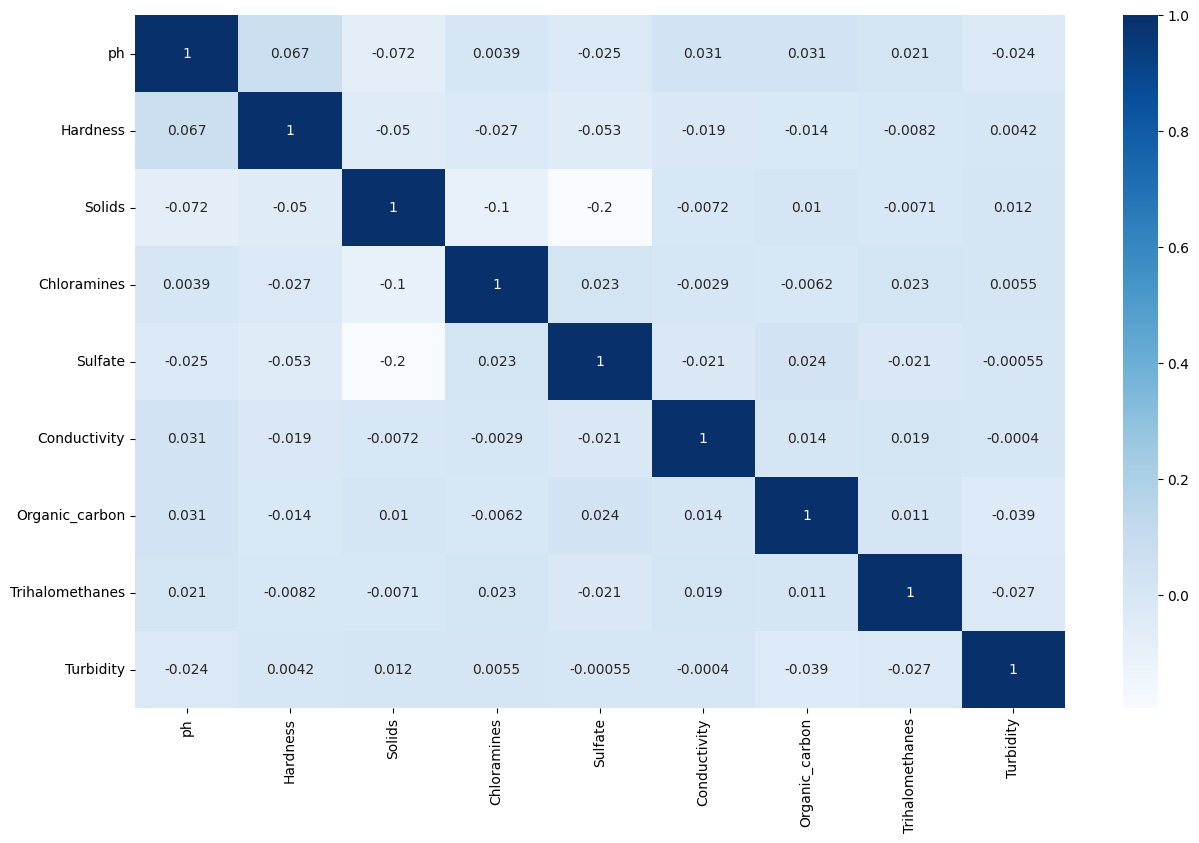

In [45]:
correlation = upsampled_scaled.corr()
plt.figure(figsize=(15, 9))
sns.heatmap(correlation, annot=True, cmap='Blues')

> * There is a significant improvement in correlations values.

### 🔹Modeling

##### 🔹Splitting train and test data

In [46]:
X_train, X_test, y_train,y_test= train_test_split(upsampled_scaled, y, test_size=0.2, random_state=42)

##### 🔹Logistic Regression, SVM, Decision Tree

NOTES:
1. logistic regression:
- Normalizer: parameter C represents the inverse of regularization strength. It controls the regularization term's impact on the optimization objective. A smaller value of C indicates stronger regularization, which penalizes large coefficients in the model, thus preventing overfitting. Conversely, a larger value of C reduces the strength of regularization, allowing the model to fit the training data more closely. In this case, C=0.1 suggests moderate regularization.

- Penalty: determines the regularization penalty applied to the model. In logistic regression, two common penalties are used: L1 regularization ('l1') and L2 regularization ('l2'). L1 regularization adds the absolute value of the coefficients to the loss function, promoting sparsity by encouraging some coefficients to be exactly zero. L2 regularization adds the squared magnitude of the coefficients to the loss function, penalizing large coefficients.

- Solver: specifies the optimization algorithm used to fit the logistic regression model to the training data. Different solvers are available for logistic regression, each suitable for different types of datasets and regularization penalties. The 'liblinear' solver is suitable for small to medium-sized datasets and supports both L1 and L2 penalties. It is efficient for binary classification tasks.

2. SVM:
- Normalizer: parameter C is the regularization parameter of the SVM model. It controls the trade-off between maximizing the margin and minimizing the classification error. A smaller value of C allows for a larger margin but may lead to more misclassifications on the training data. Conversely, a larger value of C penalizes misclassifications more heavily, resulting in a smaller margin but potentially better classification accuracy. C=10 suggests a relatively high penalty for misclassifications.

- Gamma: is the kernel coefficient for 'rbf', 'poly', and 'sigmoid' kernels. It defines the influence of a single training example, with low values meaning 'far' and high values meaning 'close'. A low value of gamma indicates a larger radius of influence for each data point, resulting in smoother decision boundaries. Conversely, a high value of gamma means each data point has a smaller radius of influence, leading to more complex decision boundaries that may be more prone to overfitting. gamma=1 suggests a relatively high influence of each training example.

3. Decision Tree:
- Max depth:  specifies the maximum depth of the decision tree. A decision tree continues to split nodes until either all leaves are pure or the maximum depth is reached. Setting max_depth=None means there is no maximum depth limit, and the tree will grow until all leaves are pure or until all leaves contain fewer samples than min_samples_split.

- Min sample split: sets the minimum number of samples required to split an internal node. If the number of samples at a node is less than min_samples_split, the node will not be split, and it will become a leaf node. This parameter helps control the complexity of the decision tree and prevents overfitting by requiring a minimum number of samples for further splitting.

> * n_jobs = -1 use all available CPU cores for parallel processing with hyperparameter tuning.

In [47]:
# Logistic Regression with hyperparameter tuning
log_reg_params = {
    'C': [0.1, 1, 10],  # Regularization.
    'penalty': ['l1', 'l2'],  # Cost function coefficients.
    'solver': ['liblinear'],  # Optimization.
    'class_weight': ['balanced'],  # Adjust weights (⬆️ weight minority, ⬇️ majority) so the model wouldn't favour majority.
    'random_state': [0] # Ensure same output with each run.
}
Log_reg = GridSearchCV(LogisticRegression(), log_reg_params, cv=5, n_jobs=-1)

# Support Vector Machine with hyperparameter tuning
svm_params = {
    'C': [0.1, 1, 10],  # Regularization.
    'gamma': [0.1, 1, 10],  # To control the similarity radius when training data.
    'random_state': [0] # Ensure same output with each run.
}
Svm = GridSearchCV(SVC(), svm_params, cv=5, n_jobs=-1)

# Decision Tree with hyperparameter tuning
dt_params = {
    'max_depth': [None, 10, 20],  # Control no. of tree levels. (when to stop splitting).
    'min_samples_split': [2, 5, 10],  # Controls splitting of nodes.
    'random_state': [0] # Ensure same output with each run.
}
decision_tree = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5, n_jobs=-1)

# printing accuracies
classifiers=[('Logistic Regression', Log_reg),('Support Vector Machine', Svm),('Decision Tree', decision_tree)]

for classifier_name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    test_accuracy = accuracy_score(y_test, classifier.predict(X_test))
    train_accuracy = accuracy_score(y_train, classifier.predict(X_train))
    overall_accuracy = accuracy_score(y_test, y_pred)
    print('{:s} - Test Accuracy: {:.2f}%, Train Accuracy: {:.2f}%, Overall Accuracy: {:.2f}%'.format(classifier_name, test_accuracy * 100, train_accuracy * 100, overall_accuracy * 100))



Logistic Regression - Test Accuracy: 49.75%, Train Accuracy: 51.38%, Overall Accuracy: 49.75%
Support Vector Machine - Test Accuracy: 87.25%, Train Accuracy: 100.00%, Overall Accuracy: 87.25%
Decision Tree - Test Accuracy: 83.50%, Train Accuracy: 100.00%, Overall Accuracy: 83.50%


### 🔹Random Forest

In [48]:
# Random Forest with hyperparameter tuning
rf_params = {
    'n_estimators': [100, 200, 300], # Max number of trees.
    'min_samples_leaf': [1, 2, 4], # Controls splitting of nodes.
    'random_state': [0] # Ensure same output with each run.
}
random_forest = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, scoring='accuracy', n_jobs=-1)

random_forest.fit(X_train, y_train)
rf_predictions_test = random_forest.predict(X_test)
rf_predictions_train = random_forest.predict(X_train)

test_accuracy = accuracy_score(y_test, rf_predictions_test)
train_accuracy = accuracy_score(y_train, rf_predictions_train)
overall_accuracy = random_forest.best_score_

print("Random Forest Test Accuracy:", test_accuracy * 100,'%')
print("Random Forest Train Accuracy:", train_accuracy * 100,'%')
print("Random Forest Accuracy:", overall_accuracy * 100,'%')

Random Forest Test Accuracy: 88.125 %
Random Forest Train Accuracy: 100.0 %
Random Forest Accuracy: 87.6092038341158 %


### 🔹Gradiant Boosting

> * The GradientBoostingClassifier is a machine learning model used for classification tasks.

> * It belongs to the ensemble learning family and combines multiple weak learners (usually decision trees) to create a strong predictive model.

In [52]:
clf = GradientBoostingClassifier()
param_grid = {
    'n_estimators': [100, 200, 300], # The number of boosting stages (trees) to be used.
    'learning_rate': [0.05, 0.1, 0.2], # The step size at which the model adapts during each boosting iteration.
    'max_depth': [3, 5, 7], # Control no. of individual tree levels. (when to stop splitting).
    'random_state': [0] # Ensure same output with each run.
}

Gb = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
Gb.fit(X_train, y_train)
GB_y_pred_test = Gb.predict(X_test)
GB_y_pred_train = Gb.predict(X_train)

test_accuracy = accuracy_score(y_test, GB_y_pred_test)
train_accuracy = accuracy_score(y_train, GB_y_pred_train)
overall_accuracy = Gb.score(X_test, y_test)

# Output the accuracies
print("Test Accuracy:", test_accuracy * 100)
print("Train Accuracy:", train_accuracy * 100)
print("Overall Accuracy:", overall_accuracy * 100)

Test Accuracy: 87.0
Train Accuracy: 100.0
Overall Accuracy: 87.0


### 🔹KNN

In [53]:
param_grid = {'n_neighbors': range(1, 21)}  # Range of values for n_neighbors from 1 to 20.
knn = KNeighborsClassifier()

Knn = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
Knn.fit(X_train, y_train)
Knn.fit(X_train, y_train)
Knn_y_pred_test = Knn.predict(X_test)
Knn_y_pred_train = Knn.predict(X_train)

test_accuracy = Knn.score(X_test, Knn_y_pred_test)
train_accuracy = Knn.score(X_train, Knn_y_pred_train)
overall_accuracy = Knn.score(X_test, y_test)

# Output the accuracies
print("Test Accuracy:", test_accuracy * 100)
print("Train Accuracy:", train_accuracy * 100)
print("Overall Accuracy:", overall_accuracy * 100)


Test Accuracy: 100.0
Train Accuracy: 100.0
Overall Accuracy: 76.0


### 🔹Confusion matrices

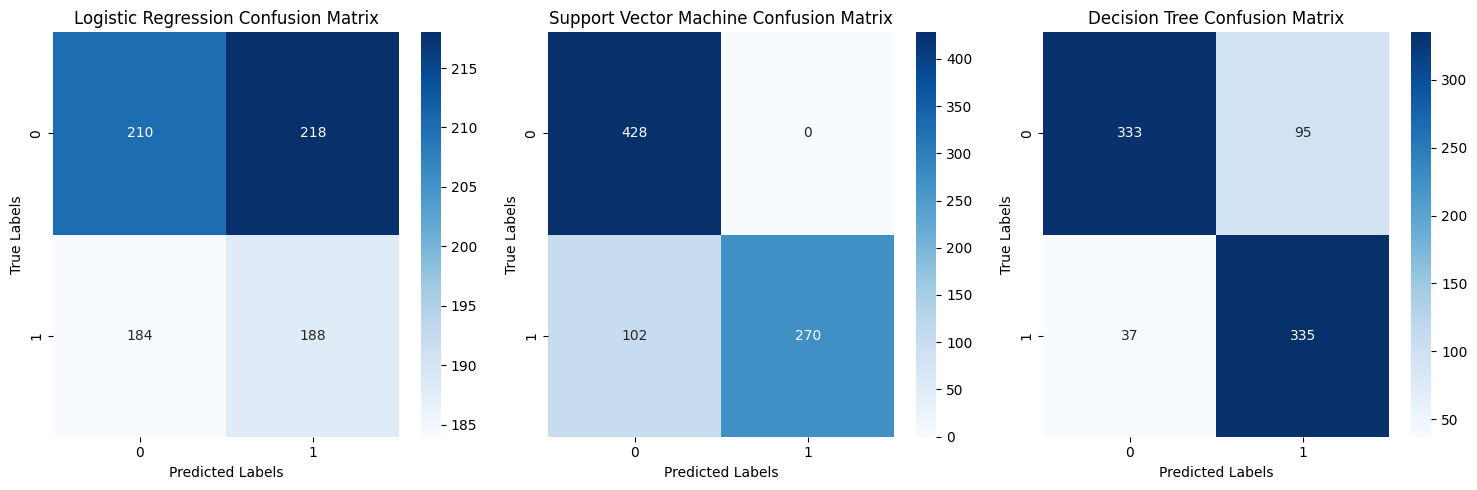

In [54]:
classifiers = [('Logistic Regression', Log_reg), ('Support Vector Machine', Svm), ('Decision Tree', decision_tree)]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i, (classifier_name, classifier) in enumerate(classifiers):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    # Plot confusion matrix
    confusion_mat = confusion_matrix(y_test, y_pred)
    sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", ax=axes[i])
    axes[i].set_title(f'{classifier_name} Confusion Matrix')
    axes[i].set_xlabel('Predicted Labels')
    axes[i].set_ylabel('True Labels')

plt.tight_layout()
plt.show()

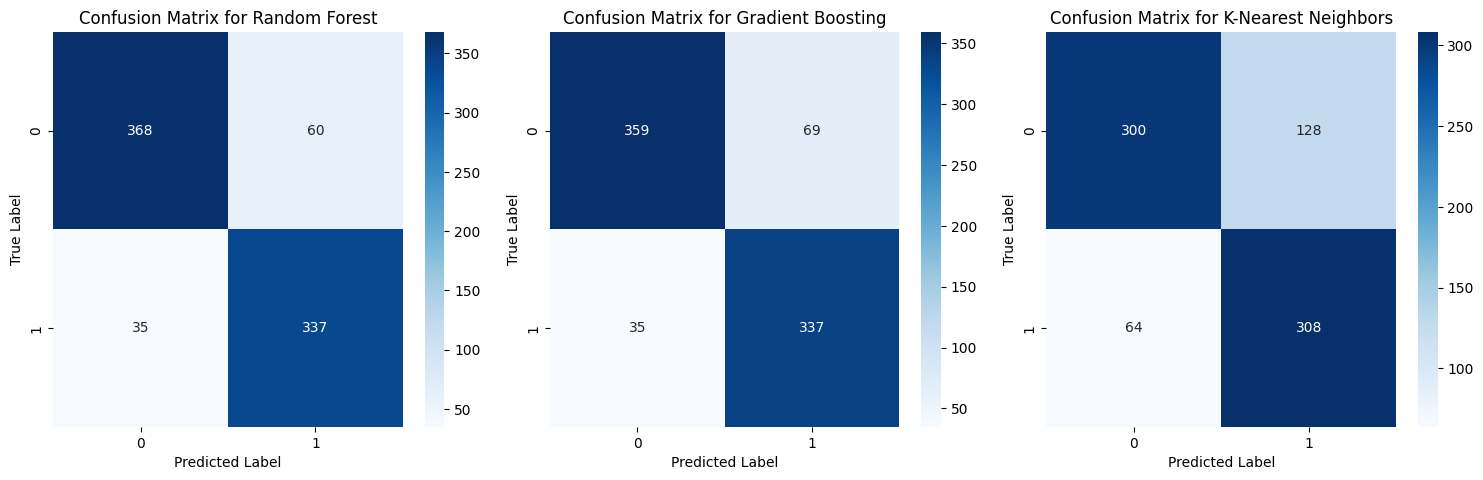

In [55]:
plt.figure(figsize=(20, 9))


# Plot for Random Forest
RF_confusion_matrix = confusion_matrix(y_test, rf_predictions_test)
plt.subplot(2, 4, 1)
sns.heatmap(RF_confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Plot for Gradient Boosting
GB_confusion_matrix = confusion_matrix(y_test, GB_y_pred_test)
plt.subplot(2, 4, 2)
sns.heatmap(GB_confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Gradient Boosting")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Plot for K-Nearest Neighbors
knn_confusion_matrix = confusion_matrix(y_test, Knn_y_pred_test)
plt.subplot(2, 4, 3)
sns.heatmap(knn_confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for K-Nearest Neighbors")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.tight_layout()
plt.show()

### 🔹Exporting Models

In [56]:
scaler_file ="scaler.joblib"
joblib.dump(sc, scaler_file)

log_reg_file='log_reg.joblib'
joblib.dump(Log_reg,log_reg_file)

svm_file='svm.joblib'
joblib.dump(Svm,svm_file)

decision_tree_file='decision_tree.joblib'
joblib.dump(decision_tree,decision_tree_file)

rf_file='rf.joblib'
joblib.dump(random_forest,rf_file)

gradient_clf_file='GB.joblib'
joblib.dump(Gb,gradient_clf_file)

knn_file='knn.joblib'
joblib.dump(Knn,knn_file)

['knn.joblib']